In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In this project, you are to apply image segmentation techniques to X-ray angiography, where X-ray images are taken when an X-ray absorbing substance is injected into the patient's blood stream to produce contrast. The resulting X-ray images have dark regions representing the blood flow within vessels. Your system should be able to automatically locate any occlusion and follow the surrounding vessel wall to compute the ratio between the minimum and nominal vessel diameters. Such results are practically important in detecting coronary disease. Your system should also accept user input of occlusion locations and perform the same percent occlusion measurement in that particular area.

(444, 400, 3) 57


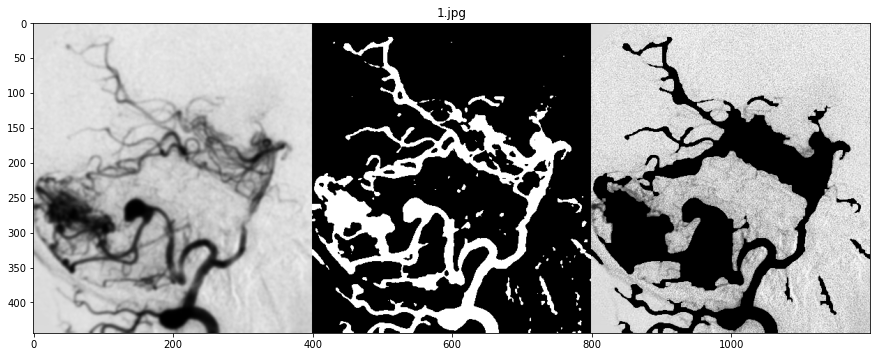

In [12]:
images_dir = '../sample-images'
image_names = os.listdir(images_dir)

for image_name in image_names:
    if '1' not in image_name:
        continue
    full_path = f'{images_dir}/{image_name}' 
    img = cv2.imread(full_path)
    x_new = int(img.shape[1] * .1)
    y_new = int(img.shape[0] * .1)
    img = img[y_new:img.shape[0] - y_new, x_new: img.shape[1] - x_new]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9,9), 0)
    block_size = int(1 / 8 * img.shape[0] / 2 * 2 + 1)
    block_size = block_size + 1 if block_size % 2 == 0 else block_size
    print(img.shape, block_size)
    edged_adap = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, block_size, 10)
    low_color = 0
    high_color = 255
    thresh = cv2.inRange(edged_adap, low_color, high_color)
    thresh = cv2.morphologyEx(edged_adap, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    edged_contour = img.copy()
#     cv2.drawContours(edged_contour, [contours], -1, (0,255,0), 2)
    for c in contours:
#         x, y = c
#         if x <= 5 or y <= 5:
#             continue
#         area = cv2.contourArea(c)
        area = cv2.contourArea(c)
        if area < 100:
            continue
        cv2.drawContours(edged_contour, [c], -1, (0,0,0), -1)
    edged_contour = cv2.cvtColor(edged_contour, cv2.COLOR_BGR2GRAY)
    
#     edged_adap_2 = cv2.adaptiveThreshold(edged_contour, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, block_size, 10)
#     edge_mask = cv2.threshold(edged_contour, 254, 255, cv2.THRESH_BINARY_INV)[0]

    #     mask = cv2.bitwise_and(gray, gray, mask = edge_mask)
    stacked = np.hstack([blurred, edged_adap, edged_contour])#, edge_mask])
    plt.figure(figsize = (15, 10))
    plt.title(image_name)
    plt.imshow(stacked, cmap = 'gray')
#     plt.imshow(edged_contour)
#     plt.imshow(img)
    break